In [130]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [131]:
data = pd.read_csv('../best-artworks-dataset/artists.csv')
data.sample(5)

,id,name,years,genre,nationality,bio,wikipedia,paintings
17,17,Frida Kahlo,1907 - 1954,"Primitivism,Surrealism",Mexican,Frida Kahlo de Rivera (Spanish pronunciation: ...,http://en.wikipedia.org/wiki/Frida_Kahlo,120
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
16,16,Francisco Goya,1746 - 1828,Romanticism,Spanish,Francisco José de Goya y Lucientes (; Spanish:...,http://en.wikipedia.org/wiki/Francisco_Goya,291
47,47,Raphael,1483 – 1520,High Renaissance,Italian,Raffaello Sanzio da Urbino (Italian: [raffaˈɛl...,https://en.wikipedia.org/wiki/Raphael,109


In [132]:
data_year = pd.DataFrame(data.years.str.split(' ',2).tolist(),columns = ['birth', 'delimiter', 'death'])
data_year.drop(["delimiter"], axis=1, inplace=True)

data["birth"] = data_year.birth
data["death"] = data_year.death
data.drop(["id", "years", "bio", "wikipedia"], axis=1, inplace=True)

In [133]:
data.sample(5)

,name,genre,nationality,paintings,birth,death
24,Sandro Botticelli,Early Renaissance,Italian,164,1445,1510
40,Henri Rousseau,Primitivism,French,70,1844,1910
23,Giotto di Bondone,Proto Renaissance,Italian,119,1266,1337
41,Georges Seurat,Post-Impressionism,French,43,1859,1891
25,Caravaggio,Baroque,Italian,55,1571,1610


In [134]:
data["birth"] = data["birth"].apply(lambda x: int(x))
data["death"] = data["death"].apply(lambda x: int(x))

data["age"] = data.death - data.birth
data.sample(5)

,name,genre,nationality,paintings,birth,death,age
49,Jackson Pollock,Abstract Expressionism,American,24,1912,1956,44
33,Henri de Toulouse-Lautrec,Post-Impressionism,French,81,1864,1901,37
37,Edvard Munch,"Symbolism,Expressionism",Norwegian,67,1863,1944,81
38,Paul Cezanne,Post-Impressionism,French,47,1839,1906,67
2,Diego Rivera,"Social Realism,Muralism",Mexican,70,1886,1957,71


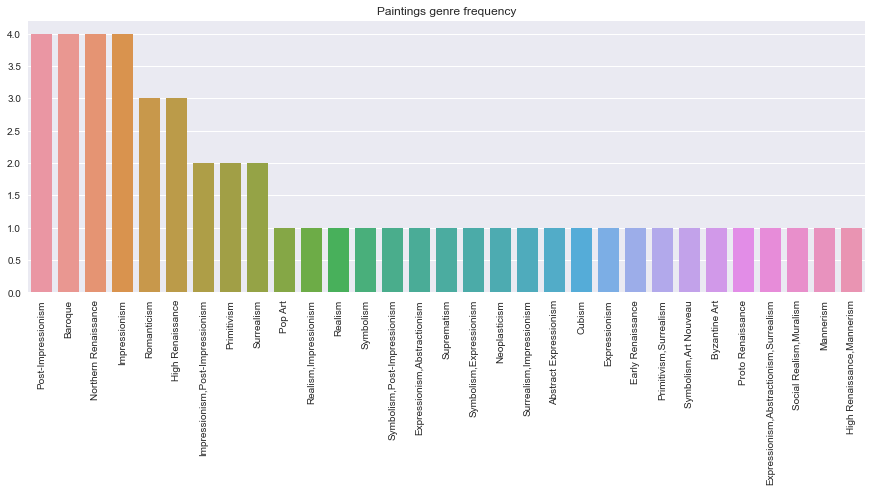

In [174]:
plt.figure(figsize=(15,5))
plt.style.use('seaborn')
sea.barplot(x=data['genre'].value_counts().index, y=data['genre'].value_counts().values)

plt.xticks(rotation=90)
plt.title("Paintings genre frequency")
plt.show()

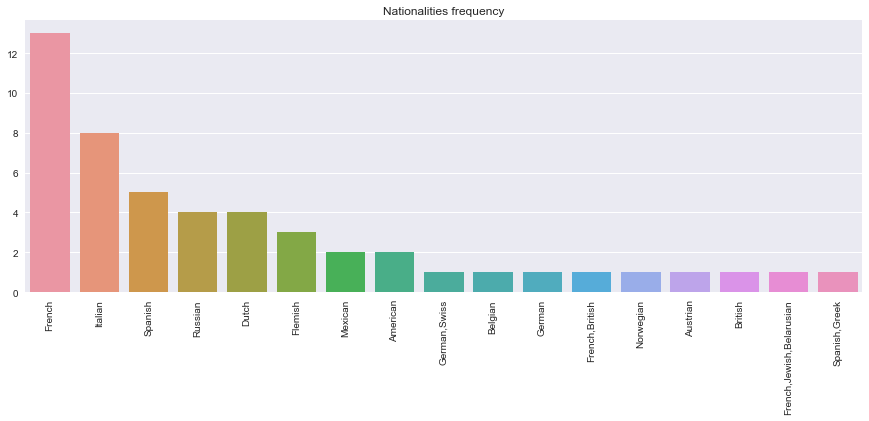

In [173]:
plt.figure(figsize=(15,5))
plt.style.use('seaborn')

sea.barplot(x=data['nationality'].value_counts().index, y=data['nationality'].value_counts().values)
plt.xticks(rotation=90)
plt.title("Nationalities frequency")
plt.show()

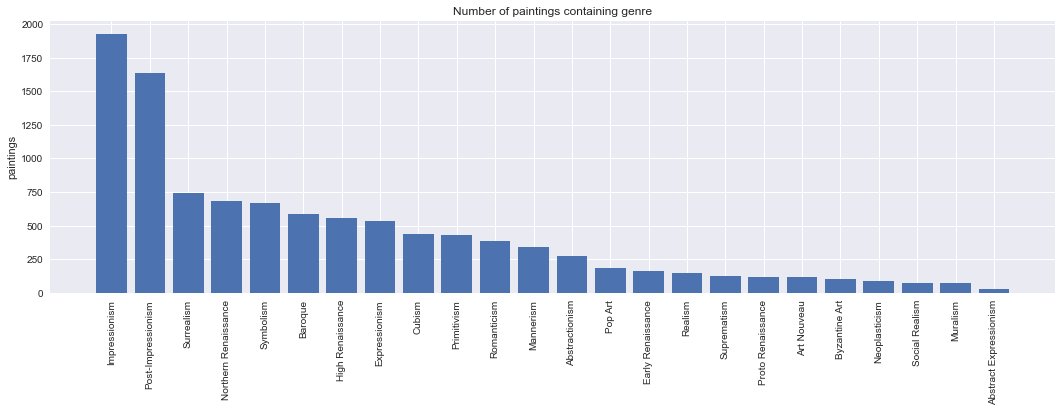

In [172]:
# Prepare dictionary for genre paintings
genre_appear = {}
df = data.groupby("genre").paintings.agg('sum')
for gs, nr in df.items():
    gs = gs.split(',')
    for g in gs:
        genre_appear[g] = genre_appear.get(g, 0) + nr
        
genre_appear = dict(sorted(genre_appear.items(), key=lambda item: item[1], reverse=True))

# plotting phase
plt.figure(figsize=(18,5))
plt.style.use('seaborn')

plt.bar(*zip(*genre_appear.items()))

plt.xticks(rotation=90)
plt.ylabel("paintings")
plt.title("Number of paintings containing genre")
plt.show()

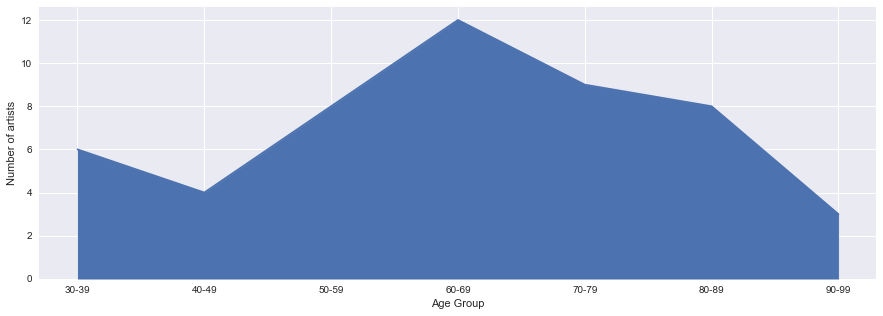

In [183]:
# add age_group column
bins=[30,39,49,59,69,79,89,99]
labels=["30-39","40-49","50-59","60-69","70-79","80-89","90-99"]
data['age_group'] = pd.cut(data['age'],bins=bins,labels=labels)

df = data.groupby(["age_group"]).size()

# plot area
plt.figure(figsize=(15,5))
plt.style.use('seaborn')

df.plot.area()
plt.xlabel("Age Group")
plt.ylabel("Number of artists")
plt.show()